<a href="https://colab.research.google.com/github/Amelbnmbh/HR-Analysis-at-HumanForYou/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Employee Attrition Prediction at HumanForYou**

---

### **Context**  
HumanForYou, an Indian pharmaceutical company, faces an annual employee attrition rate of 15%, leading to recruitment costs, training new hires, and lost productivity. The objective of this project is to identify the factors influencing employee attrition and develop predictive models to improve retention.

### **Problem**  
Management wants to understand the underlying reasons for employee attrition, particularly the factors that make some employees more likely to leave the company. This will help take proactive measures to retain key talent.



### **Project Objective**
The main goals of the project are to:
- Analyze employee data to identify factors influencing attrition.
- Develop predictive models to identify employees at risk of leaving.
- Provide recommendations to reduce employee turnover.

---
<center> Realized by <b>Amel Mosbah</b>


<p align="center">
  <img src="https://california-business-lawyer-corporate-lawyer.com/wp-content/uploads/2023/07/HR-analytics-1500x883.jpg" width="1000"/>
</p>


# Data Cleaning and Preparation





## Overview
This section details the meticulous data cleaning and preparation process executed for the  **General Data**, **Employee Survey**, **Manager Survey**, and **time tracking datasets**. The primary objective was to enhance data integrity and ensure that the datasets were fully optimized for subsequent analysis.

The process encompassed the following key steps:

1. **Data Cleaning**: Systematically addressed missing values, rectified inconsistencies, and standardized column names to improve clarity and usability.
2. **Data Transformation**: Transposed datasets, standardized time formats, and computed essential metrics, including average time spent in the office.
3. **Data Integration**: Merged the cleaned datasets into a single, comprehensive file, facilitating a streamlined approach to analysis.

This thorough and structured process provided a robust foundation for insightful analysis, enabling a nuanced understanding of employee and managerial feedback as well as time management dynamics.


<h1>Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np

## General data

In [ ]:
gd = pd.read_csv('general_data.csv')
gd.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


<h3> Check for duplicate and missing data

In [ ]:
#Check for duplicate rows in the dataset
print(f"Number of duplicate rows: {gd.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# Check for missing values in each column
gd.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


I notice that there are 19 missing entries in the **NumCompaniesWorked** column and 9 missing entries in the **TotalWorkingYears** column.

<h3> Handle missing values in 'TotalWorkingYears'

In [ ]:
findvalue = gd[gd['TotalWorkingYears'].isnull()][['YearsAtCompany', 'NumCompaniesWorked']].sort_values(by='NumCompaniesWorked')
findvalue

,YearsAtCompany,NumCompaniesWorked
2367,10,0.0
4409,21,0.0
23,20,1.0
3818,1,1.0
308,5,4.0
3120,8,4.0
137,3,7.0
574,6,7.0
1517,9,7.0


I observe that some employees have `NumCompaniesWorked` equal to 0, indicating that they did not work at any company before joining this one. Therefore, I should replace their `TotalWorkingYears` with their `YearsAtCompany`, as both values are equal.

In [ ]:
gd.loc[(gd['NumCompaniesWorked'] == 0) & (gd['TotalWorkingYears'].isnull()), 'TotalWorkingYears'] = gd['YearsAtCompany']

In [ ]:
gd['TotalWorkingYears'].mean().round()

11.0

In [ ]:
gd['TotalWorkingYears'].mode()

,TotalWorkingYears
0,10.0



Using the mode or mean to fill in the null values is not ideal in this case. The mean is 11, and the mode is 10, while some employees have been with the company for 20 years. Therefore, it would be illogical to assume that their total working years are 11 or 10.






In [ ]:
mode_values = gd.groupby('YearsAtCompany')['TotalWorkingYears'].agg('median')
mode_values.loc[[1, 3, 5, 6, 8, 9, 20]]

,TotalWorkingYears
YearsAtCompany,
1,4.0
3,6.0
5,7.0
6,7.0
8,9.0
9,10.0
20,21.0


It is more logical to replace the missing values in `TotalWorkingYears` with the median, grouped by `YearsAtCompany`.


In [ ]:
gd['TotalWorkingYears'] = gd['TotalWorkingYears'].fillna(gd['YearsAtCompany'].map(mode_values)).astype(int)

In [ ]:
# Confirm that there are no more missing values in 'TotalWorkingYears'
print(f"Remaining missing values in 'TotalWorkingYears': {gd['TotalWorkingYears'].isnull().sum()}")

Remaining missing values in 'TotalWorkingYears': 0


<h3>Handle missing values in 'NumCompaniesWorked'

In [ ]:
missing_NC = gd[gd['NumCompaniesWorked'].isnull()][['TotalWorkingYears', 'YearsAtCompany']].assign(YearsDifference=gd['TotalWorkingYears'] - gd['YearsAtCompany']).sort_values(by='YearsDifference', ascending=False)
missing_NC

,TotalWorkingYears,YearsAtCompany,YearsDifference
3533,28,5,23
343,10,1,9
210,18,10,8
3910,10,3,7
4226,5,1,4
1312,7,3,4
647,9,7,2
799,7,5,2
2696,6,4,2
1521,6,5,1


After calculating `YearsDifference = gd['TotalWorkingYears'] - gd['YearsAtCompany']`, I identified some employees with a **difference of 0**, meaning they have only worked at this company. As a result, I will update their **NumCompaniesWorked** values to 0






In [ ]:
# Update NumCompaniesWorked to 0 where TotalWorkingYears equals YearsAtCompany
gd.loc[(gd['NumCompaniesWorked'].isnull()) & (gd['TotalWorkingYears'] == gd['YearsAtCompany']),'NumCompaniesWorked'] = 0

For the remaining employees, I will update the missing **NumCompaniesWorked** values by replacing them with the median of the existing entries in the dataset grouped by YearsAtCompany.

In [ ]:
median_values = gd.groupby('YearsAtCompany')['NumCompaniesWorked'].agg('median')
gd['NumCompaniesWorked'] = gd['NumCompaniesWorked'].fillna(gd['YearsAtCompany'].map(median_values)).astype(int)

In [ ]:
# Confirm that there are no more missing values in 'NumCompaniesWorked'
print(f"Remaining missing values in 'NumCompaniesWorkeds': {gd['NumCompaniesWorked'].isnull().sum()}")

Remaining missing values in 'NumCompaniesWorkeds': 0


In [ ]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeCount            4410 non-null   int64 
 8   EmployeeID               4410 non-null   int64 
 9   Gender                   4410 non-null   object
 10  JobLevel                 4410 non-null   int64 
 11  JobRole                  4410 non-null   object
 12  MaritalStatus            4410 non-null   object
 13  MonthlyIncome            4410 non-null   int64 
 14  NumCompaniesWorked       4410 non-null  

<h3> Encode categorical variables

In [ ]:
# Convert 'Attrition' from categorical ('Yes', 'No') to numerical (1, 0)
gd['Attrition'] = gd['Attrition'].map({'No': 0, 'Yes': 1})

<h3>Descriptive statistics

In [ ]:
gd.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.690023,15.209524,8.0,0.793878,11.278458,2.799320,7.008163,2.187755,4.123129
std,9.133301,0.367780,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.495597,3.659108,0.0,0.851883,7.778868,1.288978,6.125135,3.221699,3.567327
min,18.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


I found that **EmployeeCount** is consistently 1, **StandardHours** is 8, and the minimum age is 18. Consequently, the columns **Over18**, **EmployeeCount**, and **StandardHours** provide no valuable information and should be deleted.




In [ ]:
gd.drop(columns=['Over18', 'EmployeeCount', 'StandardHours'], inplace=True)

## Manager survey

In [ ]:
ms = pd.read_csv('manager_survey_data.csv')
ms.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


<h3> Check for duplicate and missing data

In [ ]:
#Check for duplicate rows in the dataset
print(f"Number of duplicate rows: {ms.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# Check for missing values in each column
ms.isnull().sum()

,0
EmployeeID,0
JobInvolvement,0
PerformanceRating,0


In [ ]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


## Employee survey

In [ ]:
emp= pd.read_csv('employee_survey_data.csv')
emp.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


<h3> Check for duplicate and missing data

In [ ]:
#Check for duplicate rows in the dataset
print(f"Number of duplicate rows: {emp.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# Check for missing values in each column
emp.isnull().sum()

,0
EmployeeID,0
EnvironmentSatisfaction,25
JobSatisfaction,20
WorkLifeBalance,38


<h3>Handle missing values in 'EnvironmentSatisfaction'

In [ ]:
Job = emp.groupby('JobSatisfaction')['EnvironmentSatisfaction'].agg(['count', 'mean', 'median', 'min', 'max'])
Wk = emp.groupby('WorkLifeBalance')['EnvironmentSatisfaction'].agg(['count', 'mean', 'median', 'min', 'max'])
Wk, Job

(                 count      mean  median  min  max
 WorkLifeBalance                                   
 1.0                238  2.659664     3.0  1.0  4.0
 2.0               1012  2.677866     3.0  1.0  4.0
 3.0               2644  2.746596     3.0  1.0  4.0
 4.0                453  2.732892     3.0  1.0  4.0,
                  count      mean  median  min  max
 JobSatisfaction                                   
 1.0                858  2.745921     3.0  1.0  4.0
 2.0                836  2.765550     3.0  1.0  4.0
 3.0               1315  2.653232     3.0  1.0  4.0
 4.0               1356  2.752212     3.0  1.0  4.0)

I have noted that the median value for **Environment Satisfaction** across all categories is 3. This suggests that it would be appropriate to impute the missing values with this median.


In [ ]:
emp["EnvironmentSatisfaction"] = emp["EnvironmentSatisfaction"].fillna(emp["EnvironmentSatisfaction"].median()).astype(int)

<h3>Handle missing values in 'JobSatisfaction'

In [ ]:
env = emp.groupby('EnvironmentSatisfaction')['JobSatisfaction'].agg(['count', 'mean', 'median', 'min', 'max'])
Work = emp.groupby('WorkLifeBalance')['JobSatisfaction'].agg(['count', 'mean', 'median', 'min', 'max'])
Work, env

(                 count      mean  median  min  max
 WorkLifeBalance                                   
 1.0                238  2.647059     3.0  1.0  4.0
 2.0               1016  2.833661     3.0  1.0  4.0
 3.0               2646  2.691610     3.0  1.0  4.0
 4.0                452  2.738938     3.0  1.0  4.0,
                          count      mean  median  min  max
 EnvironmentSatisfaction                                   
 1                          843  2.750890     3.0  1.0  4.0
 2                          851  2.722679     3.0  1.0  4.0
 3                         1365  2.716484     3.0  1.0  4.0
 4                         1331  2.729527     3.0  1.0  4.0)

I will apply the same approach and impute the missing values using this median as well.

In [ ]:
emp["JobSatisfaction"] = emp["JobSatisfaction"].fillna(emp["JobSatisfaction"].median()).astype(int)

<h3>Handle missing values in 'WorkLifeBalance'

In [ ]:
Env = emp.groupby('EnvironmentSatisfaction')['WorkLifeBalance'].agg(['count', 'mean', 'median', 'min', 'max'])
job = emp.groupby('JobSatisfaction')['WorkLifeBalance'].agg(['count', 'mean', 'median', 'min', 'max'])
Env, job

(                         count      mean  median  min  max
 EnvironmentSatisfaction                                   
 1                          835  2.732934     3.0  1.0  4.0
 2                          850  2.727059     3.0  1.0  4.0
 3                         1365  2.797070     3.0  1.0  4.0
 4                         1322  2.764750     3.0  1.0  4.0,
                  count      mean  median  min  max
 JobSatisfaction                                   
 1                  853  2.771395     3.0  1.0  4.0
 2                  834  2.767386     3.0  1.0  4.0
 3                 1332  2.783033     3.0  1.0  4.0
 4                 1353  2.730229     3.0  1.0  4.0)

I will similarly impute the missing values with this median

In [ ]:
emp["WorkLifeBalance"] = emp["WorkLifeBalance"].fillna(emp["WorkLifeBalance"].median()).astype(int)

## Time

### In-time Data

In [ ]:
 # Load the dataset
intime = pd.read_csv('in_time.csv')
intime.head(2)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20


<h3> Check for duplicate and missing data

In [ ]:
#Check for duplicate rows in the dataset
print(f"Number of duplicate rows: {intime.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
#Checking for Missing Values
intime.isnull().sum()

,0
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


<h3>Handle Missing Values

In [ ]:
# Transpose the DataFrame to switch rows with columns
intime_T = intime.T

In [ ]:
# Filling Missing Values with Mode
for employee in intime_T:
    value_to_fill = intime_T[employee].value_counts().sort_values(ascending=False).index[1]
    intime_T[employee] = intime_T[employee].fillna(value_to_fill)

In [ ]:
# Converting Time to Minutes in a Day
for employee in intime_T:
    datetime_data = pd.to_datetime(intime_T[employee])  # Convert to datetime format
    hour_data = datetime_data.dt.strftime('%H').apply(lambda x: int(x))  # Extract hours as integers
    min_data = datetime_data.dt.strftime('%M').apply(lambda x: int(x))  # Extract minutes as integers
    data_to_return = hour_data * 60 + min_data  # Convert to minutes since the start of the day
    intime_T[employee] = data_to_return  # Update the DataFrame with the new values

### Out-time Data

In [ ]:
# Load the dataset
outime = pd.read_csv('out_time.csv')
outime.head(2)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58


<h3> Check for duplicate and missing data

In [ ]:
#Check for duplicate rows in the dataset
print(f"Number of duplicate rows: {outime.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
#Checking for Missing Values
intime.isnull().sum()

,0
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


<h3>Handle Missing Values

In [ ]:
outime_T = outime.T  # Transpose the 'outime' DataFrame
for employee in outime_T:
    value_to_fill = outime_T[employee].value_counts().sort_values(ascending=False).index[1]
    outime_T[employee] = outime_T[employee].fillna(value_to_fill)  # Fill missing values

In [ ]:
# Converting Out-time to Minutes
for employee in outime_T:
    datetime_data = pd.to_datetime(outime_T[employee])  # Convert to datetime
    hour_data = datetime_data.dt.strftime('%H').apply(lambda x: int(x))  # Get the hours
    min_data = datetime_data.dt.strftime('%M').apply(lambda x: int(x))  # Get the minutes
    data_to_return = hour_data * 60 + min_data  # Convert to total minutes
    outime_T[employee] = data_to_return  # Update the DataFrame

### Time Spent in the Office


In [ ]:
# Calculate the time spent in the Office
office_time_spent = outime_T - intime_T
office_time_spent = office_time_spent.iloc[1:, :]  # Remove the 'Unnamed: 0' row

In [ ]:
# Calculate the mean time spent for each employee
agg_time_spent = pd.DataFrame(office_time_spent.T.mean(axis=1), columns=['Time_spent'])

In [ ]:
# Calculate time spent in hours
agg_time_spentH = (agg_time_spent / 60).round().astype(int)

In [ ]:
# Combine gd and agg_time_spent DataFrames column-wise into new df
df= pd.concat([gd,agg_time_spentH],axis=1)

## Final Version

In [ ]:
# Merge df with emp and mg DataFrames on 'EmployeeID' to create a combined dataset
data = df.merge(emp, on='EmployeeID').merge(ms, on='EmployeeID')

<h3>Cheking

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeID,0
Gender,0
JobLevel,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   int64 
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeID               4410 non-null   int64 
 8   Gender                   4410 non-null   object
 9   JobLevel                 4410 non-null   int64 
 10  JobRole                  4410 non-null   object
 11  MaritalStatus            4410 non-null   object
 12  MonthlyIncome            4410 non-null   int64 
 13  NumCompaniesWorked       4410 non-null   int64 
 14  PercentSalaryHike        4410 non-null  

# Data Exploration



## Overview
In this section, I conduct exploratory data analysis (EDA) to detect trends, patterns, and correlations in the datasets. This analysis helps in understanding the underlying relationships within the data and identifying any significant trends.

<h2> Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_style('whitegrid')
sns.set_palette("pastel")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Time_spent,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,6,1,0,0,7,3,4,2,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,3,5,1,4,8,3,2,4,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,2,5,0,3,7,2,2,1,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,5,8,7,5,7,4,4,3,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,2,6,0,4,8,4,1,3,3,3


<h2>Descriptive Statistics

In [ ]:
data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Time_spent,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.690023,15.209524,0.793878,...,2.799320,7.008163,2.187755,4.123129,7.702268,2.725170,2.729478,2.763492,2.729932,3.153741
std,9.133301,0.367780,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.495597,3.659108,0.851883,...,1.288978,6.125135,3.221699,3.567327,1.396142,1.089852,1.098904,0.703541,0.711400,0.360742
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,0.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,...,2.000000,3.000000,0.000000,2.000000,7.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,0.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,...,3.000000,5.000000,1.000000,3.000000,7.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,...,3.000000,9.000000,3.000000,7.000000,8.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,1.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,...,6.000000,40.000000,15.000000,17.000000,11.000000,4.000000,4.000000,4.000000,4.000000,4.000000


<h2> Distribution of attrition

Attrition
0    3699
1     711
Name: count, dtype: int64


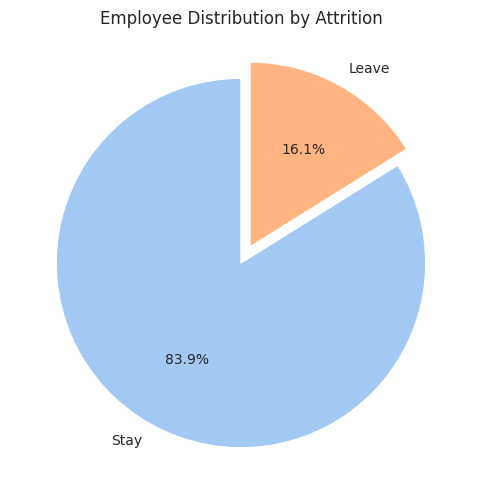

In [ ]:
# Distribution of attrition
attrition_counts = data['Attrition'].value_counts()
print(attrition_counts)

# Visualize attrition distribution
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=['Stay', 'Leave'], autopct='%1.1f%%', startangle=90, explode=[0, 0.1])
plt.title('Employee Distribution by Attrition')
plt.show()

In [ ]:
attrition_data = data[data['Attrition'] == 1]
attrition_data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Time_spent,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,711.000000,711.0,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,...,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,33.607595,1.0,9.012658,2.877637,2191.767932,2.037975,61682.616034,2.929677,15.481013,0.780591,...,2.654008,5.130802,1.945148,2.852321,8.309423,2.472574,2.471167,2.662447,2.704641,3.172996
std,9.675693,0.0,7.772368,1.014233,1270.136654,1.057485,44792.067695,2.673944,3.775289,0.858899,...,1.154834,5.941598,3.148633,3.138918,1.479402,1.163540,1.115296,0.814471,0.761739,0.378510
min,18.000000,1.0,1.000000,1.000000,2.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,28.000000,1.0,2.000000,2.000000,1072.000000,1.000000,28440.000000,1.000000,12.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,2.000000,3.000000
50%,32.000000,1.0,7.000000,3.000000,2165.000000,2.000000,49080.000000,1.000000,14.000000,1.000000,...,3.000000,3.000000,1.000000,2.000000,8.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,39.000000,1.0,15.000000,4.000000,3341.000000,2.000000,71040.000000,5.000000,18.000000,1.000000,...,3.000000,7.000000,2.000000,5.000000,10.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,58.000000,1.0,29.000000,5.000000,4403.000000,5.000000,198590.000000,9.000000,25.000000,3.000000,...,6.000000,40.000000,15.000000,14.000000,11.000000,4.000000,4.000000,4.000000,4.000000,4.000000


<h2>Age :

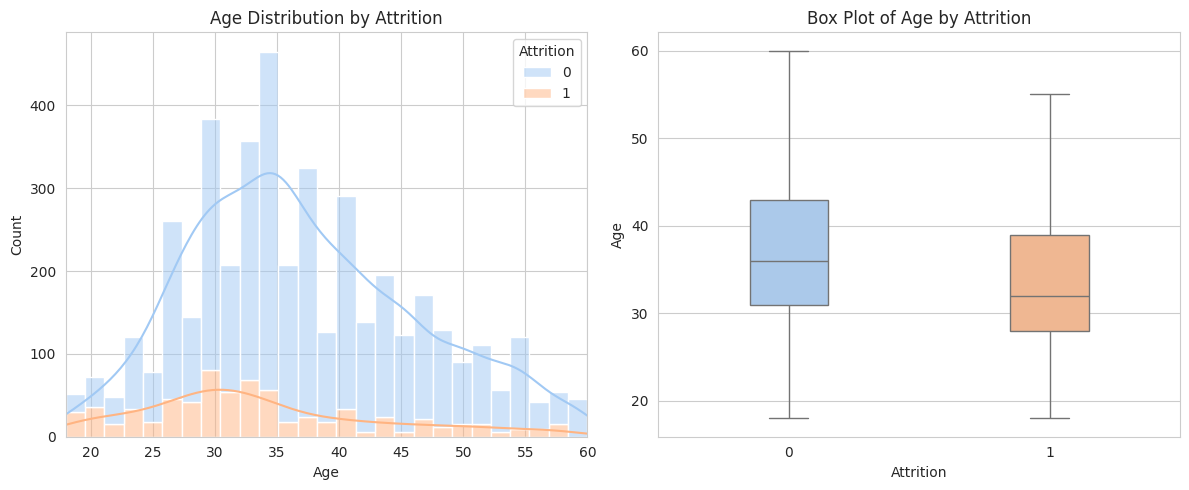

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.xlim(18, 60)
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='Age', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Box Plot of Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

We observe that younger employees are more likely to leave the organization, with an average departure age of 32.

<h2> Gender :

In [ ]:
# Convert 'Gender' from categorical ('Female', 'Male') to numerical (0, 1)
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

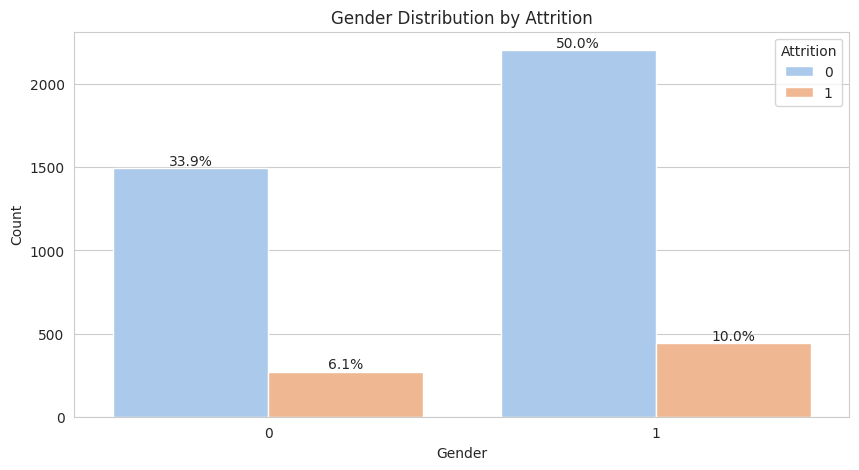

In [ ]:
plt.figure(figsize=(10, 5))
gender_plot = sns.countplot(data=data, x='Gender', hue='Attrition')
plt.title('Gender Distribution by Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
gender_counts = data['Gender'].value_counts()
total_gender = gender_counts.sum()
for patch in gender_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_gender) * 100
        gender_plot.annotate(f'{percentage:.1f}%',
                             (patch.get_x() + patch.get_width() / 2, height),
                             ha='center', va='bottom', fontsize=10)
plt.show()

Gender does not appear to have a strong effect on attrition, as both men and women show relatively low departure rates.

<h2>MaritalStatus :

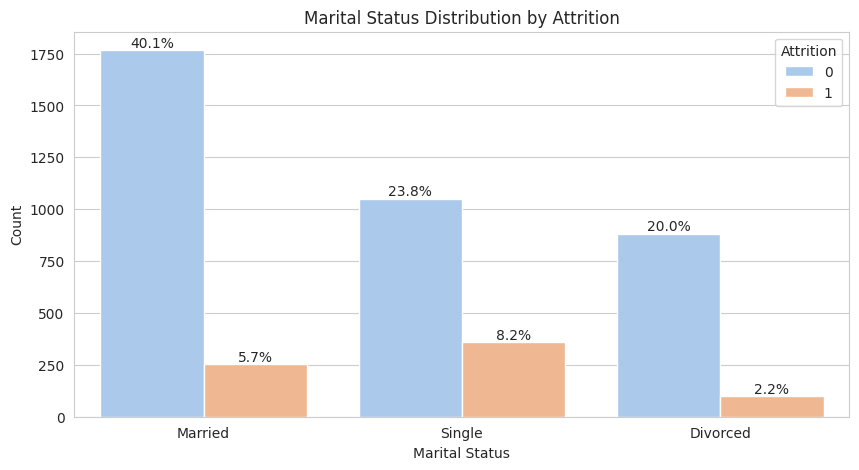

In [ ]:
plt.figure(figsize=(10, 5))
marital_plot = sns.countplot(data=data, x='MaritalStatus', hue='Attrition')
plt.title('Marital Status Distribution by Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
marital_counts = data['MaritalStatus'].value_counts()
total_marital = marital_counts.sum()
for patch in marital_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_marital) * 100
        marital_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

Marital status appears to influence attrition, with single employees having a higher likelihood of leaving compared to married or divorced employees.

<h2>Education :

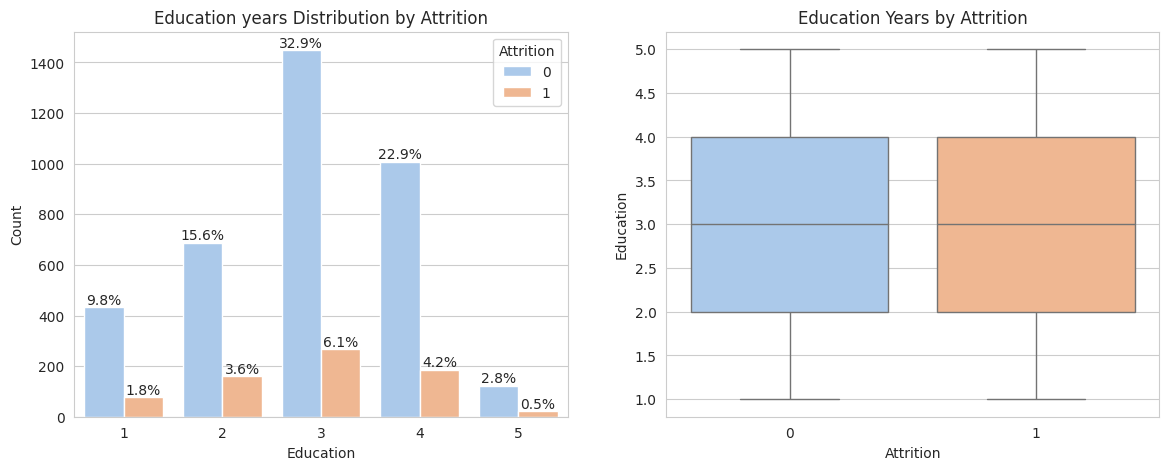

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
marital_plot = sns.countplot(data=data, x='Education', hue='Attrition')
plt.title('Education years Distribution by Attrition')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)
marital_counts = data['Education'].value_counts()
total_marital = marital_counts.sum()
for patch in marital_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_marital) * 100
        marital_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='Education', hue='Attrition', data=data,legend=False)
plt.title('Education Years by Attrition')
plt.show()

The boxplot shows an equal visualization with 3 years of education as the mean, and the distribution is symmetric for both employees who leave and those who stay, this suggests that education level does not have a significant effect on attrition.

<h2>Education Field :

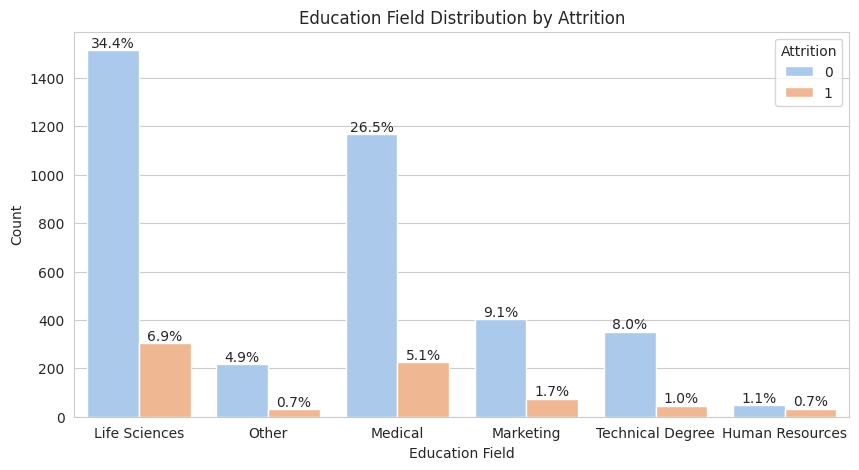

In [ ]:
plt.figure(figsize=(10, 5))
marital_plot = sns.countplot(data=data, x='EducationField', hue='Attrition')
plt.title('Education Field Distribution by Attrition')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=0)
marital_counts = data['EducationField'].value_counts()
total_marital = marital_counts.sum()
for patch in marital_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_marital) * 100
        marital_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

The data indicates that employees with degrees in **Life Science** and **Medical fields** have higher retention rates, while those with degrees in **Human Resources** show higher attrition. This suggests that **education field** may influence employee retention, with certain disciplines correlating with lower turnover.


<h2>Department :

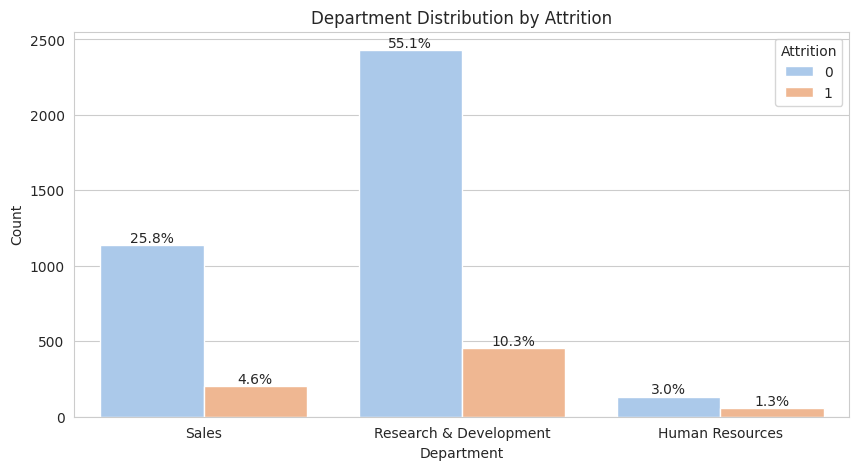

In [ ]:
plt.figure(figsize=(10, 5))
marital_plot = sns.countplot(data=data, x='Department', hue='Attrition')
plt.title('Department Distribution by Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=0)
marital_counts = data['Department'].value_counts()
total_marital = marital_counts.sum()
for patch in marital_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_marital) * 100
        marital_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

<h2> Job Role :

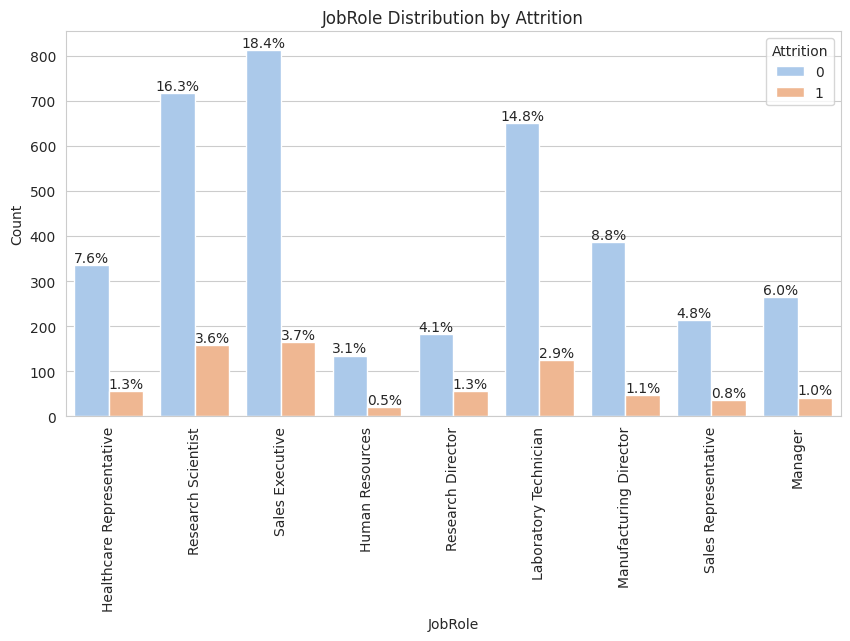

In [ ]:
plt.figure(figsize=(10, 5))
marital_plot = sns.countplot(data=data, x='JobRole', hue='Attrition')
plt.title('JobRole Distribution by Attrition')
plt.xlabel('JobRole')
plt.ylabel('Count')
plt.xticks(rotation=90)
marital_counts = data['JobRole'].value_counts()
total_marital = marital_counts.sum()
for patch in marital_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_marital) * 100
        marital_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

Job role does have an effect on attrition. Roles like Sales Executive and Research Scientist have a higher proportion of employees staying compared to their attrition rates, indicating lower turnover. In contrast, roles like Sales Representatives and Research Director show relatively low turnover.

<h2> Job Level :

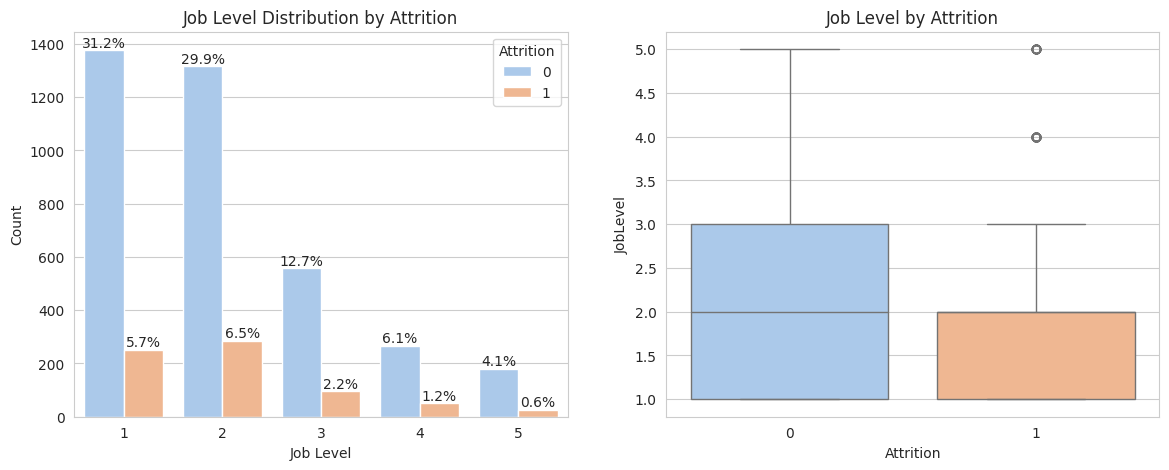

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
marital_plot = sns.countplot(data=data, x='JobLevel', hue='Attrition')
plt.title('Job Level Distribution by Attrition')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
marital_counts = data['JobLevel'].value_counts()
total_marital = marital_counts.sum()
for patch in marital_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_marital) * 100
        marital_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='JobLevel', hue='Attrition', data=data,legend=False)
plt.title('Job Level by Attrition')
plt.show()

Job level appears to influence attrition. Lower job levels (1 and 2) have higher proportions of employees both staying and leaving, but retention rates are much higher overall. Attrition drops significantly as job level increases, suggesting that employees in higher job levels (3 and above) are less likely to leave the campny.

<h3>

<h2>Years At Company :

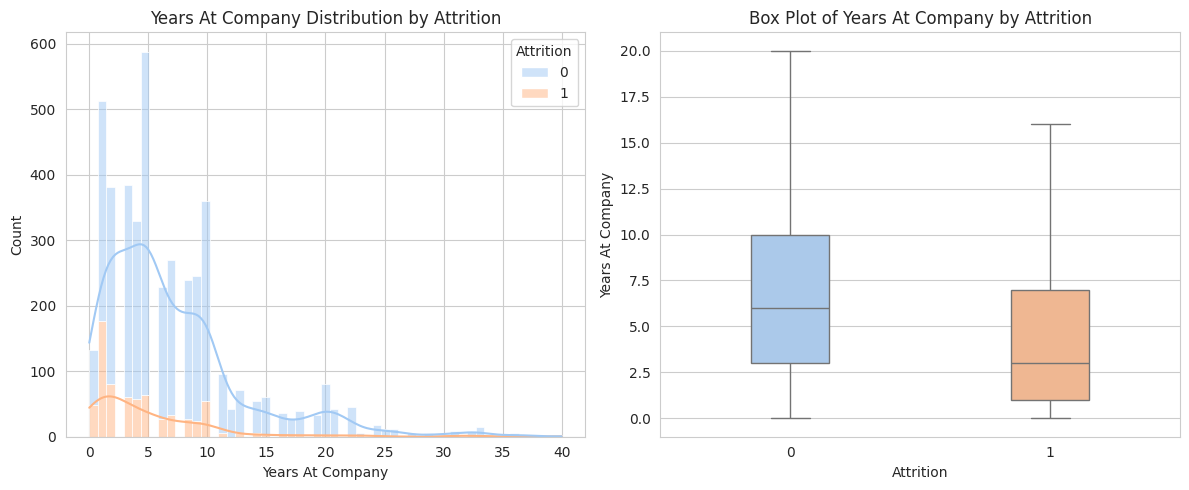

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='YearsAtCompany', hue='Attrition', multiple='stack', kde=True)
plt.title('Years At Company Distribution by Attrition')
plt.xlabel('Years At Company')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='YearsAtCompany', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Box Plot of Years At Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years At Company')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Employees who leave generally have shorter tenures, indicating that attrition is more prevalent in the earlier stages of employment.

<h2>Years Since Last Promotion :

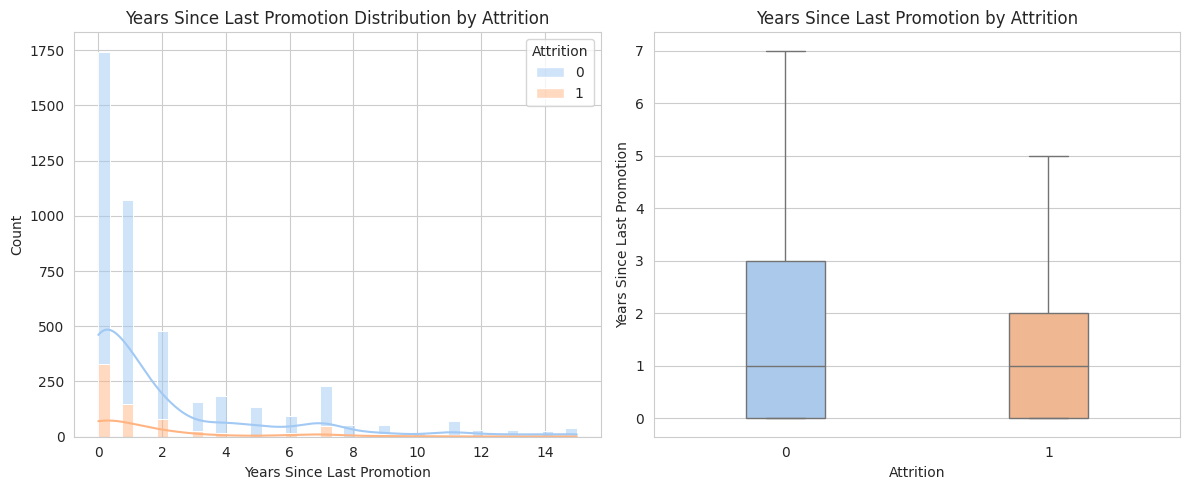

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='YearsSinceLastPromotion', hue='Attrition', multiple='stack', kde=True)
plt.title('Years Since Last Promotion Distribution by Attrition')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='YearsSinceLastPromotion', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Years Since Last Promotion by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

The upper range differs: employees who stay have a higher third quartile (3 years) and maximum (7 years) compared to those who leave (Q3 of 2 years and max of 5 years). This suggests that, although early promotion timing is similar, employees who stay might be experiencing longer-term career growth opportunities, which could influence retention.

<h2>Years With Current Manager :

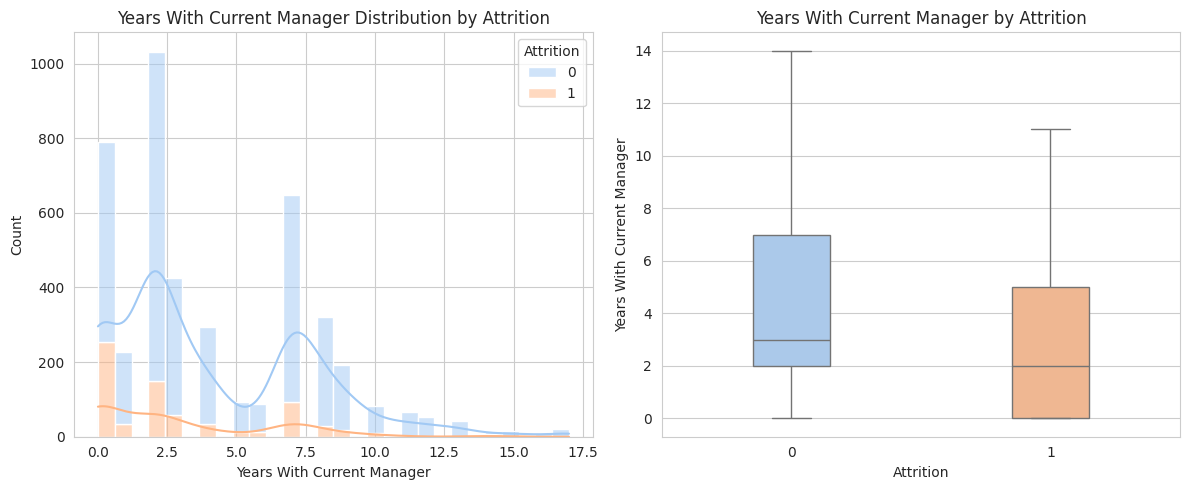

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='YearsWithCurrManager', hue='Attrition', multiple='stack', kde=True)
plt.title('Years With Current Manager Distribution by Attrition')
plt.xlabel('Years With Current Manager')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='YearsWithCurrManager', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Years With Current Manager by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years With Current Manager')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Employees who stay tend to have longer tenures with their current manager, with a higher third quartile and maximum years compared to those who leave. This suggests that a longer, more stable relationship with a manager may be associated with employee retention, while shorter manager tenure could be linked to higher attrition.

<h2>Total Working Years :

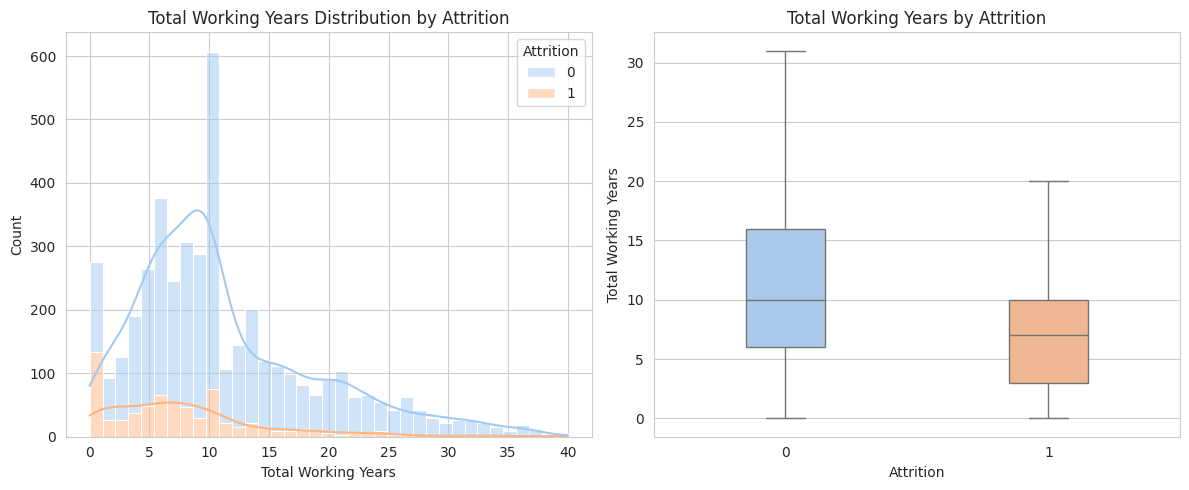

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='TotalWorkingYears', hue='Attrition', multiple='stack', kde=True)
plt.title('Total Working Years Distribution by Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='TotalWorkingYears', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Total Working Years by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Employees with more career experience are more likely to stay. Those who leave tend to have fewer working years, indicating that attrition is more common among employees with shorter overall experience.

<h2>Number Of Companies Worked In :

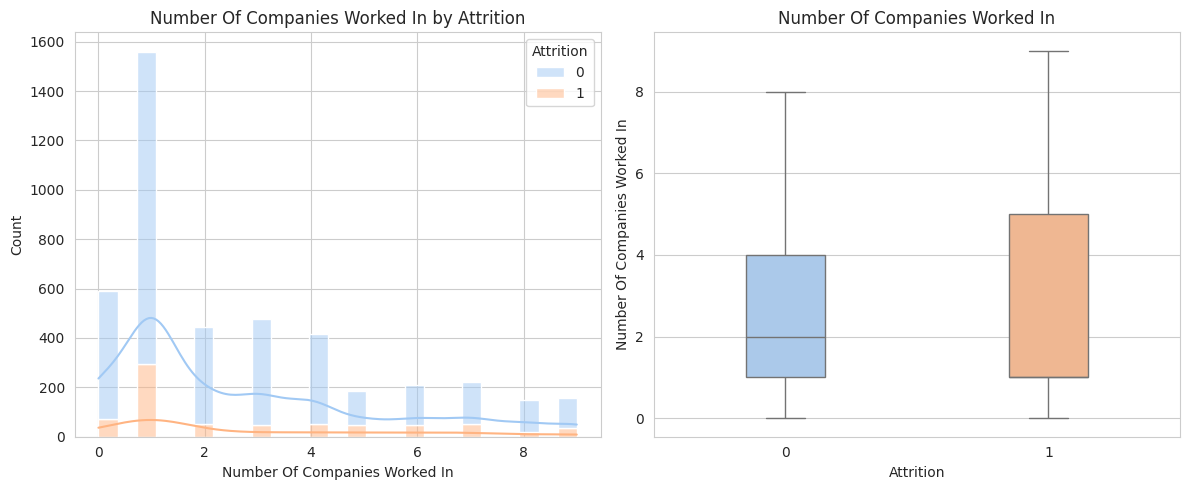

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='NumCompaniesWorked', hue='Attrition', multiple='stack', kde=True)
plt.title('Number Of Companies Worked In by Attrition')
plt.xlabel('Number Of Companies Worked In')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='NumCompaniesWorked', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Number Of Companies Worked In')
plt.xlabel('Attrition')
plt.ylabel('Number Of Companies Worked In')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Attrition is more common among employees with fewer previous companies, suggesting that those with less varied workplace experience may be more likely to leave the company.

<h2>Time Spent in work

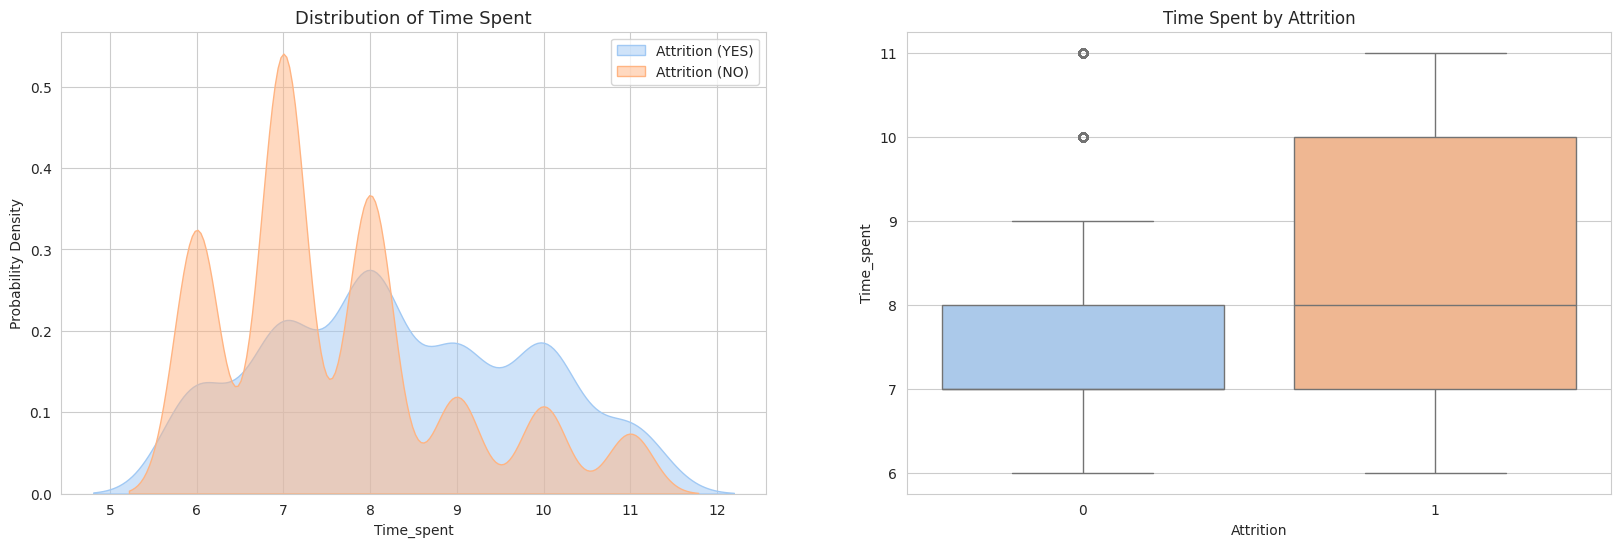

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data['Time_spent'][data.Attrition == 1], fill=True,alpha=0.5)
sns.kdeplot(data['Time_spent'][data.Attrition == 0], fill=True, alpha=0.5)
plt.title('Distribution of Time Spent', fontsize=13)
plt.ylabel('Probability Density')
plt.legend(['Attrition (YES)', 'Attrition (NO)'])
plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='Time_spent', hue='Attrition', data=data, legend=False)
plt.title('Time Spent by Attrition')
plt.show()

Employees who work the standard 8-hour day tend to be more stable, while those who leave typically spend more time at work.

<h2> Monthly Income :

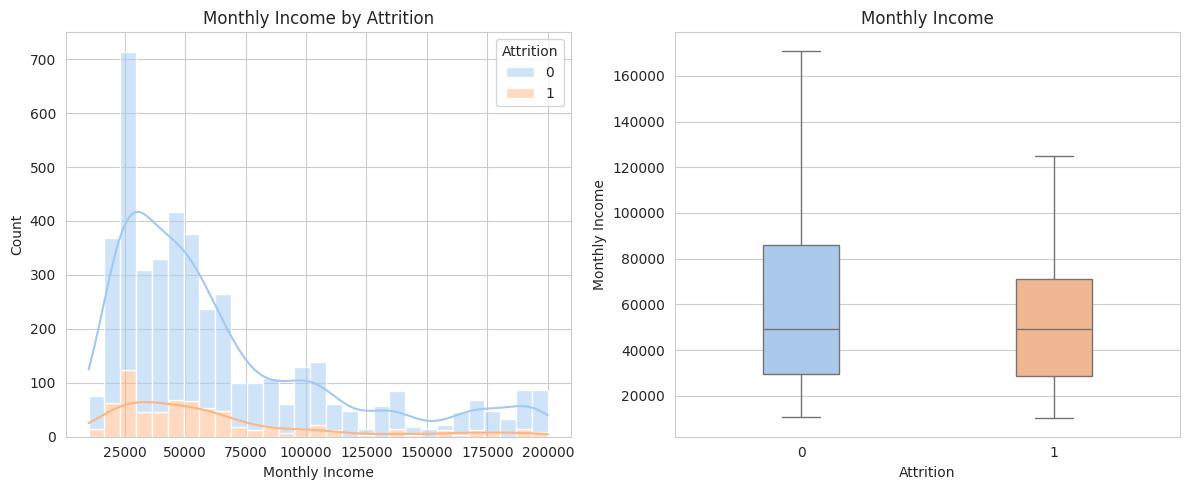

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=True)
plt.title('Monthly Income by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Monthly Income')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Employees who stay generally have a higher income range, while those who leave show a somewhat narrower income range

<h2>Percent Salary Hike :

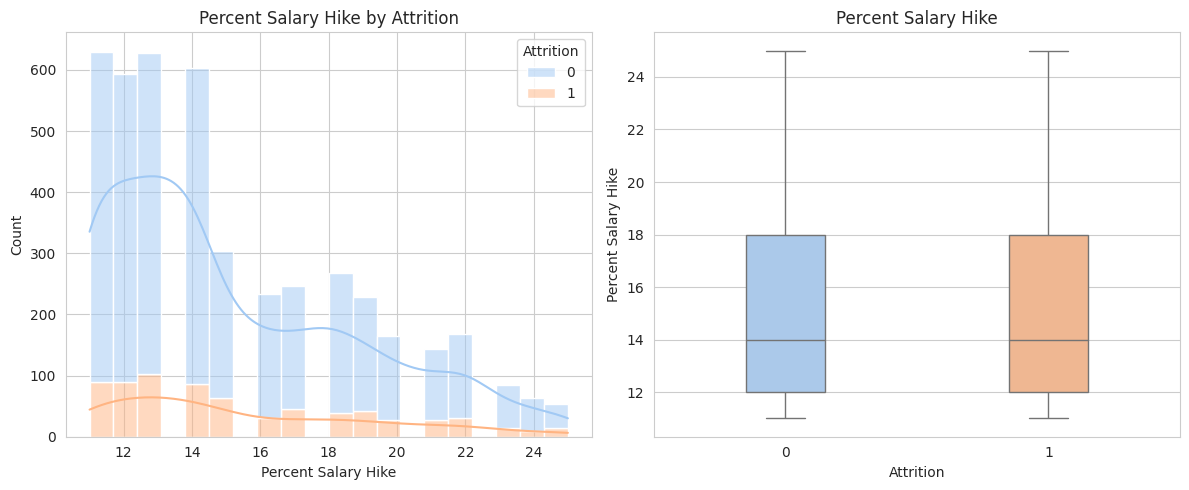

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='PercentSalaryHike', hue='Attrition', multiple='stack', kde=True)
plt.title('Percent Salary Hike by Attrition')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='PercentSalaryHike', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Percent Salary Hike')
plt.xlabel('Attrition')
plt.ylabel('Percent Salary Hike')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

There is no significant difference in the salary hike percentages between employees who stay and those who leave, suggesting that salary increases may not be a key factor in employee attrition.

<h2>Stock Option Level :

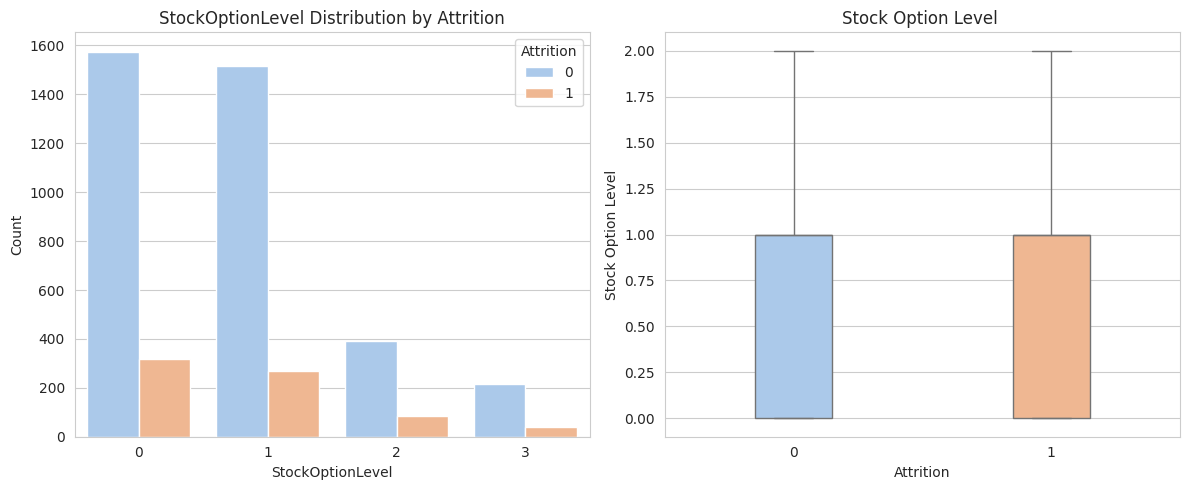

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
marital_plot = sns.countplot(data=data, x='StockOptionLevel', hue='Attrition')
plt.title('StockOptionLevel Distribution by Attrition')
plt.xlabel('StockOptionLevel')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='StockOptionLevel', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Stock Option Level ')
plt.xlabel('Attrition')
plt.ylabel('Stock Option Level')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

There is no significant difference in the Stock Option Level between employees who stay and those who leave, suggesting that may not be a key factor in employee attrition.

<h2>Distance From Home :

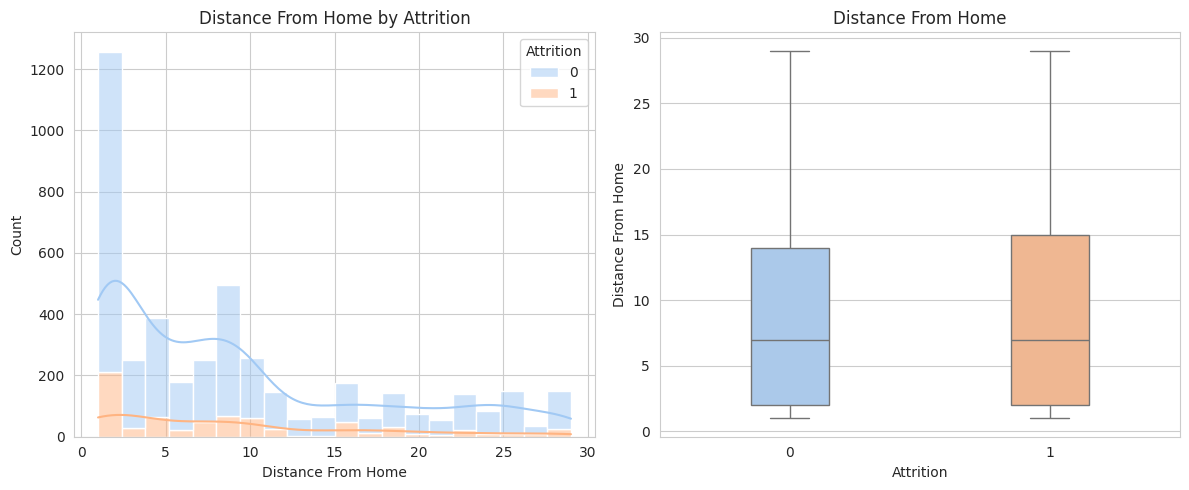

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='DistanceFromHome', hue='Attrition', multiple='stack', kde=True)
plt.title('Distance From Home by Attrition')
plt.xlabel('Distance From Home')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Attrition', y='DistanceFromHome', hue='Attrition', width=0.3, showfliers=False, dodge=False)
plt.title('Distance From Home')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

There is no significant difference in the distance from home between employees who stay and those who leave, suggesting that commute distance may not be a major factor influencing attrition.

<h2>Business Travel

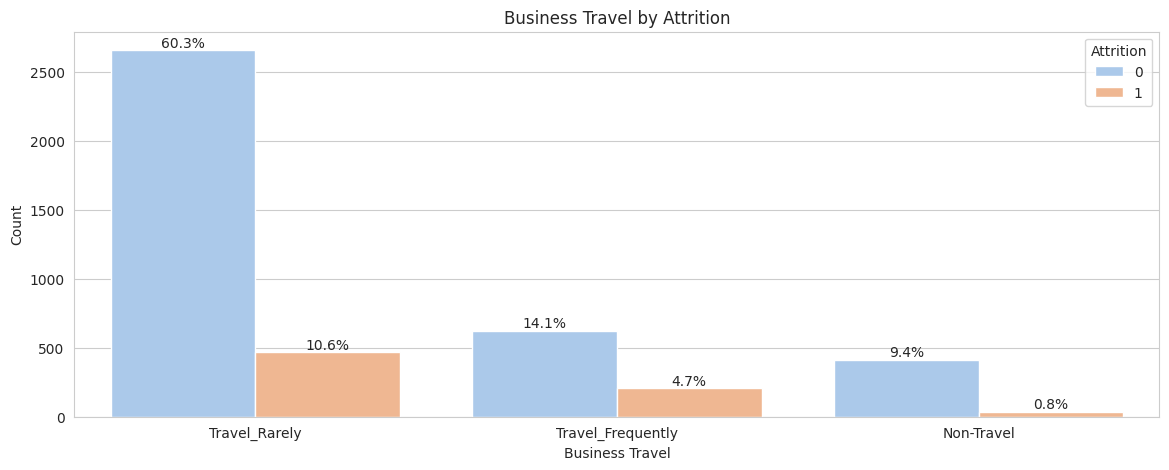

In [ ]:
plt.figure(figsize=(14, 5))
bus_plot = sns.countplot(data=data, x='BusinessTravel', hue='Attrition')
plt.title('Business Travel by Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.xticks(rotation=0)
bus_counts = data['BusinessTravel'].value_counts()
total_bus = bus_counts.sum()
for patch in bus_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_bus) * 100
        bus_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

Employees who leave the company tend to travel less frequently, with a significant proportion of those who leave traveling rarely. In contrast, employees who stay have a higher proportion of frequent travelers. This suggests that employees who do not travel frequently or at all may have a higher likelihood of leaving the company.

<h2>Environment Satisfaction :

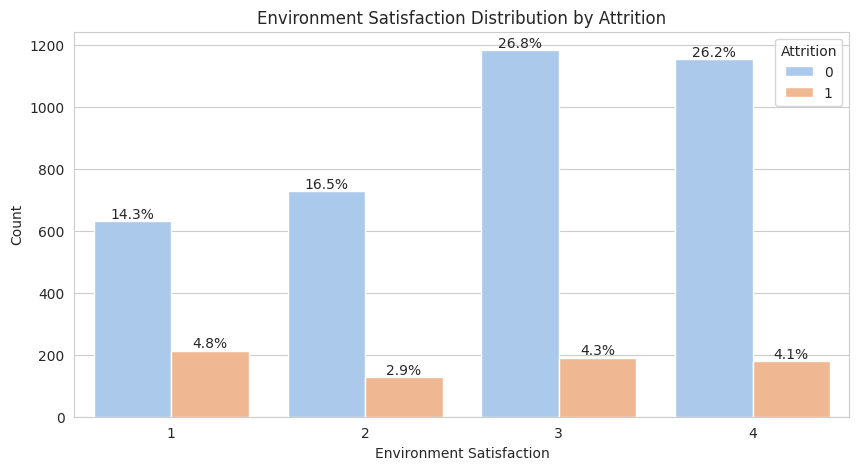

In [ ]:
plt.figure(figsize=(10, 5))
env_plot = sns.countplot(data=data, x='EnvironmentSatisfaction', hue='Attrition')
plt.title('Environment Satisfaction Distribution by Attrition')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=0)
env_counts = data['EnvironmentSatisfaction'].value_counts()
total_env = env_counts.sum()
for patch in env_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_env) * 100
        env_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

The distribution suggests that lower environment satisfaction is associated with higher attrition, with a higher percentage of employees who leave the company rating their environment satisfaction as lower 1

<h2>Job Satisfaction :

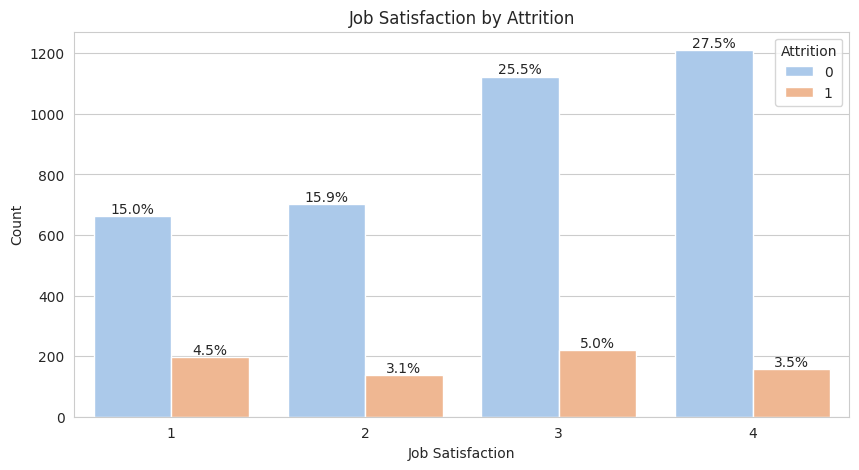

In [ ]:
plt.figure(figsize=(10, 5))
job_plot = sns.countplot(data=data, x='JobSatisfaction', hue='Attrition')
plt.title('Job Satisfaction by Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=0)
job_counts = data['JobSatisfaction'].value_counts()
total_job = job_counts.sum()
for patch in job_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_job) * 100
        job_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

Employees with lower job satisfaction ratings are more likely to leave, while those with higher satisfaction ratings are more likely to stay.

<h2>Work Life Balance :

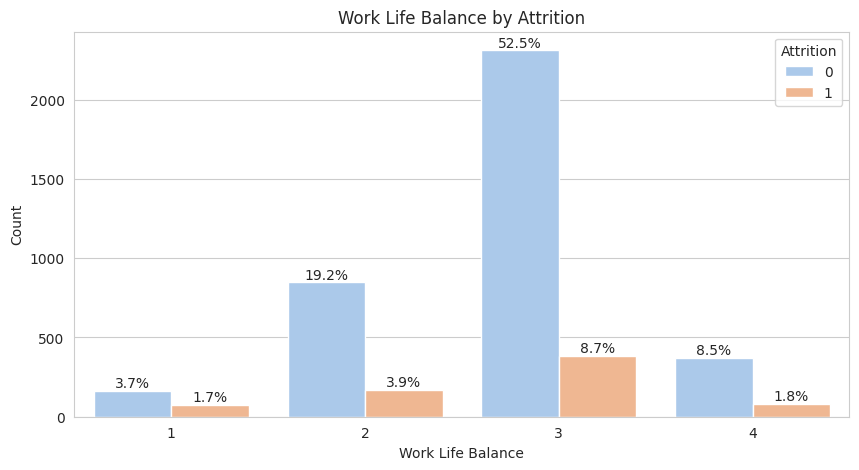

In [ ]:
plt.figure(figsize=(10, 5))
wk_plot = sns.countplot(data=data, x='WorkLifeBalance', hue='Attrition')
plt.title('Work Life Balance by Attrition')
plt.xlabel('Work Life Balance')
plt.ylabel('Count')
plt.xticks(rotation=0)
wk_counts = data['WorkLifeBalance'].value_counts()
total_wk = wk_counts.sum()
for patch in wk_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_wk) * 100
        wk_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

Employees with lower work-life balance ratings are more likely to leave, while those with higher ratings tend to stay.

<h2>Performance Rating

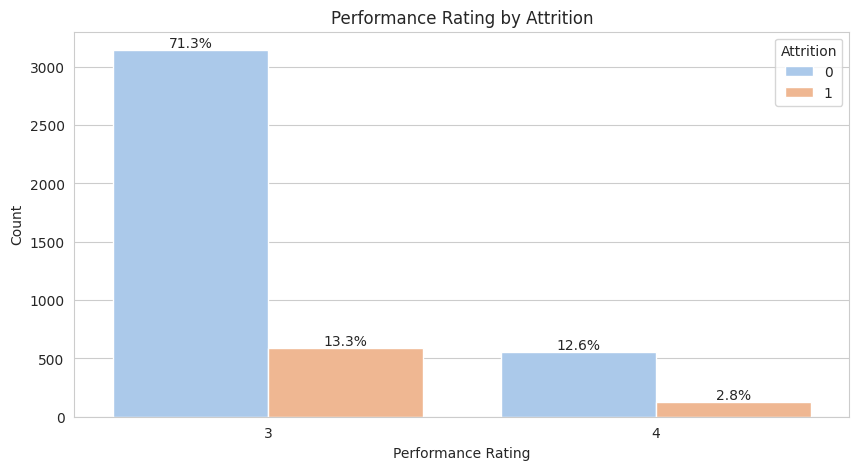

In [ ]:
plt.figure(figsize=(10, 5))
pr_plot = sns.countplot(data=data, x='PerformanceRating', hue='Attrition')
plt.title('Performance Rating by Attrition')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
pr_counts = data['PerformanceRating'].value_counts()
total_pr = pr_counts.sum()
for patch in pr_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height / total_pr) * 100
        pr_plot.annotate(f'{percentage:.1f}%',
                              (patch.get_x() + patch.get_width() / 2, height),
                              ha='center', va='bottom', fontsize=10)
plt.show()

Employees with higher performance ratings are more likely to stay, with the majority of those who remain rating their performance as 3, while a smaller proportion of those who leave have high performance ratings.

<h1> Correlation - Statistics

In [ ]:
dataf = data.drop(columns=['EmployeeID'])
results = []
for column in dataf.select_dtypes(include=['int64']).columns:
    if column != 'Attrition':
        pearson_coef, p_value = scipy.stats.pearsonr(dataf['Attrition'], dataf[column])
        results.append((column, pearson_coef, p_value))
results_df = pd.DataFrame(results, columns=['Column', 'Pearson Correlation Coefficient', 'P-value'])
results_df = results_df.sort_values(by='Pearson Correlation Coefficient', ascending=False)
results_df

,Column,Pearson Correlation Coefficient,P-value
14,Time_spent,0.190683,2.213550e-37
6,NumCompaniesWorked,0.042107,5.163278e-03
7,PercentSalaryHike,0.032533,3.074339e-02
19,PerformanceRating,0.023403,1.202036e-01
3,Gender,0.018125,2.288197e-01
8,StockOptionLevel,-0.006839,6.498073e-01
1,DistanceFromHome,-0.009730,5.182860e-01
4,JobLevel,-0.010290,4.945172e-01
2,Education,-0.015111,3.157293e-01
18,JobInvolvement,-0.015588,3.007024e-01



#### Strongest Influencers on Attrition
- **Total Working Years (-0.1708)**: A notable negative correlation suggests that employees with more total working years are less likely to leave, indicating that greater career experience may increase an employee's commitment to the company.
- **Age (-0.1592)**: Older employees are less likely to leave, as shown by a negative correlation. This may reflect greater stability or deeper roots in their roles or industries.
- **Years with Current Manager (-0.1562)**: More years under the same manager correlates with lower attrition, suggesting the importance of manager familiarity or stability in employee retention.
- **Years at Company (-0.1344)**: Tenure at the company is inversely correlated with attrition, with employees who have been at the company longer showing a higher likelihood to stay.

#### Satisfaction and Balance Factors
- **Job Satisfaction (-0.1031)** and **Environment Satisfaction (-0.1016)**: Higher satisfaction in job roles and the workplace environment is associated with lower attrition, emphasizing the importance of job fulfillment and a positive workplace environment in retaining employees.
- **Work-Life Balance (-0.0630)**: A moderate inverse correlation suggests that employees with a better work-life balance are less likely to leave, supporting the importance of a balanced workload for retention.

#### Minor Influencers on Attrition
- **Time Spent (0.1907)**: A positive correlation indicates a slight increase in retention with more hours worked, though this relationship is weak.
- **Percent Salary Hike (0.0325)** and **Num Companies Worked (0.0421)**: Both show minor correlations, suggesting that salary hikes and previous workplace experience have limited impact on attrition.
- **Monthly Income (-0.0312)** and **Years Since Last Promotion (-0.0330)**: These show small correlations with attrition, indicating that financial factors and promotion timing are secondary considerations in an employee’s decision to stay or leave.

#### Negligible Influencers
- Variables such as **Stock Option Level (-0.0068)**, **Distance from Home (-0.0097)**, **Job Level (-0.0103)**, **Education (-0.0151)**, **Job Involvement (-0.0156)**, and **Performance Rating (0.0234)** display minimal or insignificant correlations with attrition. This suggests that factors like stock options, commute distance, and formal education level have little effect on employee turnover.


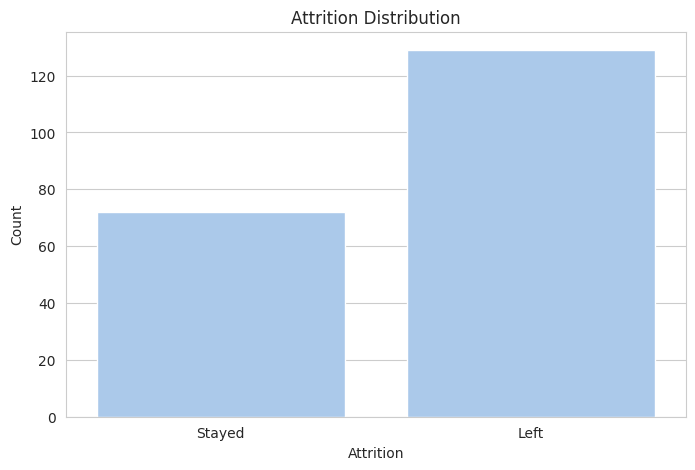

In [ ]:
single_young_employees_time = data[(data['MaritalStatus'] == 'Single') & (data['Age'] < 32) & (data['YearsAtCompany'] < 3)]
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Attrition',
    data=single_young_employees_time)

plt.title("Attrition Distribution")
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

Younger, single employees with less than three years at the company tend to have higher attrition rates. This suggests they may be exploring career opportunities or seeking roles offering better growth and stability, as they are still in the early stages of their careers and may not have strong ties to the organization.

#Data Modeling

### Data preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
labelEncoder = LabelEncoder()
data['BusinessTravel'] = labelEncoder.fit_transform(data['BusinessTravel'])
data['MaritalStatus'] = labelEncoder.fit_transform(data['MaritalStatus'])
data['Department'] = labelEncoder.fit_transform(data['Department'])
data['EducationField'] = labelEncoder.fit_transform(data['EducationField'])
data['JobRole'] = labelEncoder.fit_transform(data['JobRole'])

# Define X (features) and y (target)
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Logistic regression model

In [ ]:
# Initialize and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predict the values for the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Accuracy: 0.8515
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       741
           1       0.60      0.21      0.31       141

    accuracy                           0.85       882
   macro avg       0.73      0.59      0.62       882
weighted avg       0.82      0.85      0.82       882



>The model performs well in predicting employees who stay, with high precision and recall, but struggles with predicting attrition (employees who leave), showing low recall and F1-score for this class. The class imbalance likely contributes to this, as the model is biased towards predicting employees who stay. Improving class handling and model tuning could enhance performance for predicting attrition.

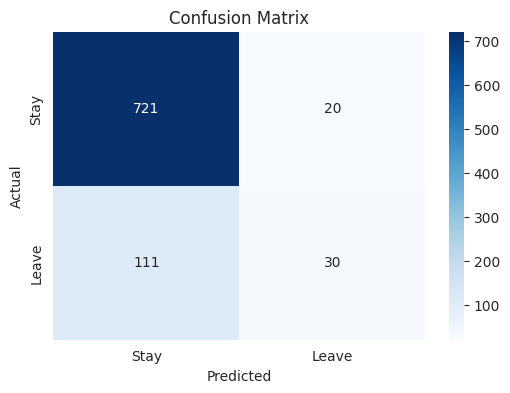

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

>As mentioned previously, the model performs well in predicting employees who leave the company, with 721 true positives. However, it struggles with predicting employees who stay, as indicated by the relatively high number of false positives (111) and low true negatives (30).

###  K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

In [ ]:
# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
# Model Evaluation for KNN
print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.8628
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       741
           1       0.63      0.35      0.45       141

    accuracy                           0.86       882
   macro avg       0.76      0.65      0.68       882
weighted avg       0.84      0.86      0.85       882



The model performs well overall with 86% accuracy, but struggles with predicting turnover, as seen in the low recall of 35% for employees who leave, despite a strong precision of 63%.

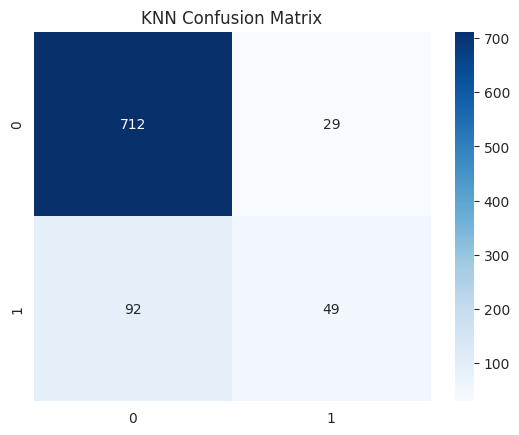

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

The 92 FP indicate that 92 employees who actually left the company were predicted to stay. This suggests the model is incorrectly classifying some employees at risk of turnover as staying

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

In [ ]:
# Model Evaluation
print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(f"AUC: {roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1]):.4f}")

Gradient Boosting Results:
Accuracy: 0.8980
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       741
           1       0.87      0.43      0.57       141

    accuracy                           0.90       882
   macro avg       0.88      0.71      0.76       882
weighted avg       0.90      0.90      0.88       882

AUC: 0.9046



The model performs well overall with 90% accuracy, but struggles with predicting turnover, as seen in the low recall of 43% for employees who leave, despite a strong precision of 87%.

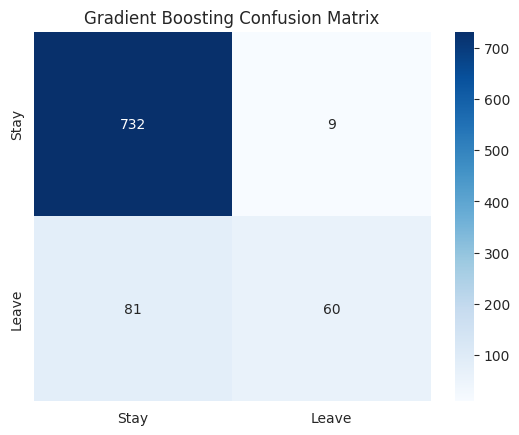

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues',xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

The 81 FP indicate that 81 employees who actually left the company were predicted to stay. This suggests the model is incorrectly classifying some employees at risk of turnover as staying

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [ ]:
# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Model Evaluation for SVM
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.9150
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       741
           1       0.93      0.50      0.65       141

    accuracy                           0.91       882
   macro avg       0.92      0.75      0.80       882
weighted avg       0.92      0.91      0.90       882



The model performs well overall with 91% accuracy, but struggles with predicting turnover, as seen in the low recall of 50% for employees who leave, despite a strong precision of 93%.

Confusion Matrix:


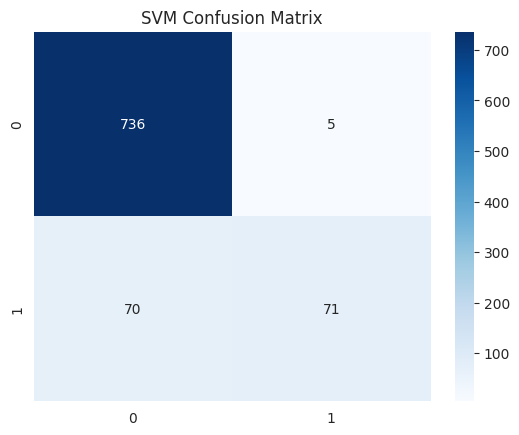

In [ ]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

The 70 FP indicate that 70 employees who actually left the company were predicted to stay. This suggests the model is incorrectly classifying some employees at risk of turnover as staying

###RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions on test data
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

In [ ]:
# Displaying results for Random Forest
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(class_report_rf)
print(f"AUC: {roc_auc_rf:.4f}")

Random Forest Results:
Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       1.00      0.92      0.96       141

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.98       882
weighted avg       0.99      0.99      0.99       882

AUC: 0.9999


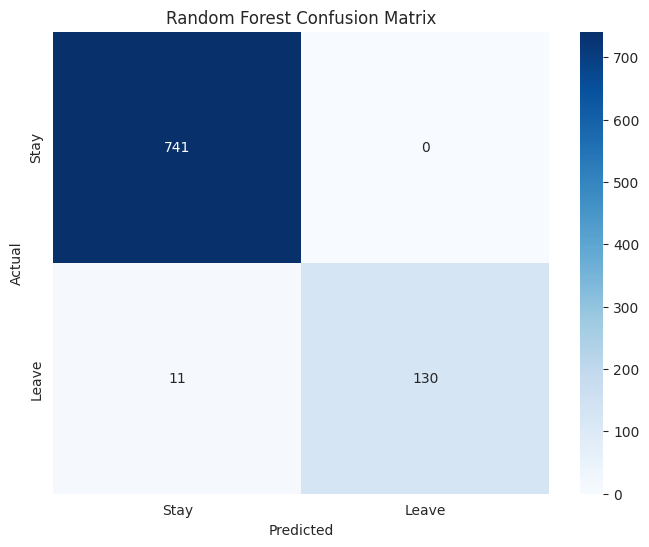

In [ ]:
# Visualizing the Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**High True Positives (741) and No False Negatives (0)**: The model is very good at predicting employees who will leave the company, as there are no instances where employees who actually leave are misclassified as staying.
**False Positives (11)**: There are very few employees predicted to leave who actually stay, which might indicate that the model is conservative in predicting attrition.
**Low True Negatives (130)**: While the model does well with predicting who will leave, it struggles to predict employees who will stay, given that the number of correct predictions for staying employees is low.

###XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
# Model Evaluation for XGBoost
print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Results:
Accuracy: 0.9921
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       0.98      0.97      0.98       141

    accuracy                           0.99       882
   macro avg       0.99      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



>This model achieved an impressive 99.21% **accuracy**, excelling in predicting employee attrition. It shows 100% recall for employees who stayed and 97% recall for those who left, with 98% precision for attrition. The F1-scores are strong (1.00 for class 0 and 0.98 for class 1), highlighting a good balance between precision and recall. The model demonstrates outstanding ability to differentiate between employees who stay and those who leave.


Confusion Matrix:


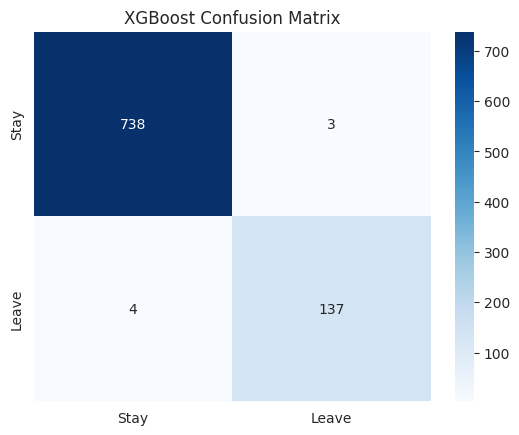

In [ ]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues',xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title("XGBoost Confusion Matrix")
plt.show()

The confusion matrix highlights the model's strong performance, with 738 true positives, 4 false positives, 3 false negatives, and 137 true negatives, reflecting its high accuracy and robust predictive ability for both employee attrition and retention.

<h2>AUC-ROC Curve

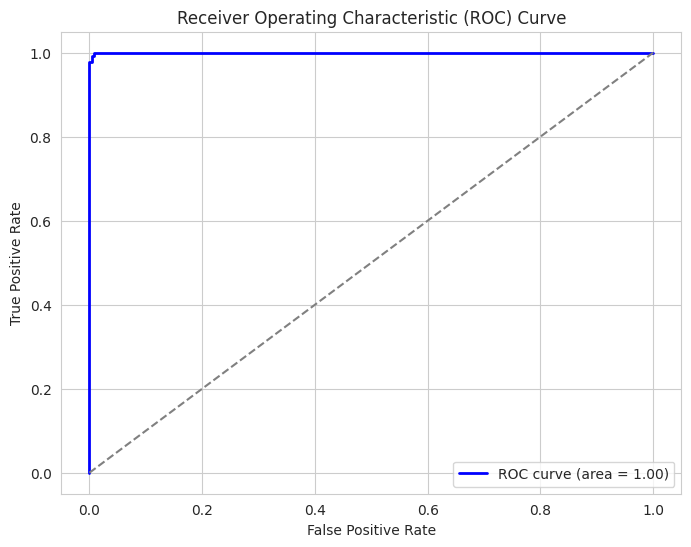

AUC: 0.9999


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")

> IT'S TOOO GOOD

<h2>Feature Importances

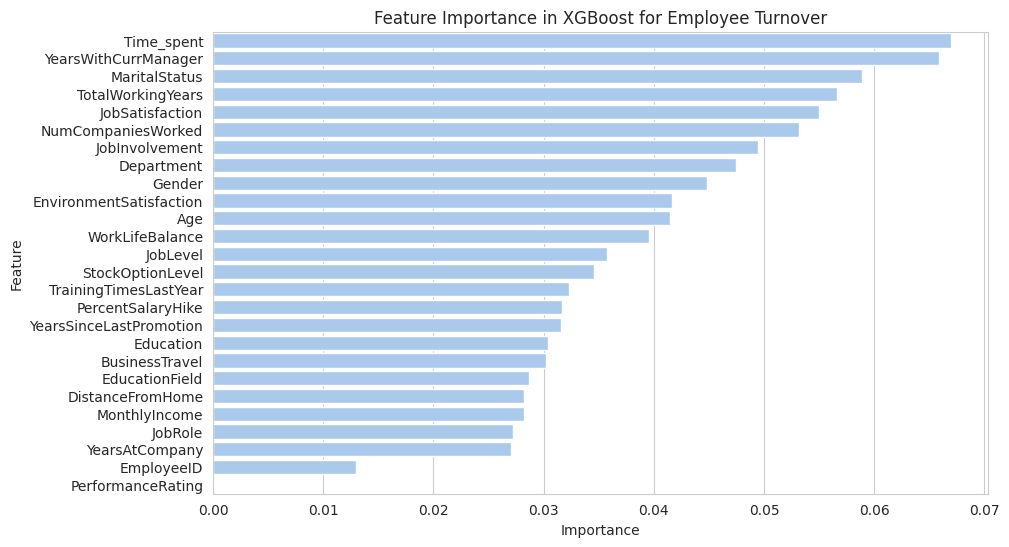

In [ ]:
importances_xgb = xgb_model.feature_importances_
feature_importance_xgb_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_xgb})
feature_importance_xgb_df = feature_importance_xgb_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb_df)
plt.title('Feature Importance in XGBoost for Employee Turnover')
plt.show()

#Conclusion
The key factors influencing employee attrition or retention include **the number of years working with the current manager, total years of work experience, the number of companies worked at, and marital status**. These factors are interconnected. Employees who have worked longer at a company and have established strong connections with their current manager tend to stay, as they have developed a deeper bond and are less likely to leave unless nearing retirement.

In contrast, younger employees with fewer years of experience and a shorter career history are more likely to leave in search of job stability and better satisfaction. These individuals are often single, which can contribute to a lack of personal stability, leading to a greater tendency to change jobs frequently.

In addition to the factors mentioned, employees who work beyond  **the standard 8-hour** workday are also more likely to leave. Working overtime regularly may lead to discomfort, burnout, or a lack of work-life balance, making employees seek opportunities elsewhere. This overwork can affect their overall well-being, leading them to prioritize personal time and a healthier work-life balance, which increases the likelihood of attrition.


#**Recommendation**

To address the key factors influencing employee attrition at HumanForYou, the following strategies are recommended:

1. **Focus on Employee Development and Managerial Relationships**:
   - Implement **mentorship programs** that foster strong relationships between employees and managers. This will help build deeper connections, particularly for those with shorter tenure, making them less likely to leave.
   - Provide **career development opportunities** such as training and upskilling, so employees can see long-term growth prospects within the company.

2. **Support Work-Life Balance**:
   - Introduce **flexible working hours** or **remote work options** to alleviate pressure on employees who may feel overworked, especially those who regularly work beyond the standard 8-hour workday.
   - Monitor and manage overtime to ensure that employees have enough time for personal life and are not experiencing burnout.

3. **Retention Strategies for Younger Employees**:
   - Young, single employees are more likely to leave in search of stability and job satisfaction. **Enhance employee engagement** through:
     - **Social and recreational activities** to strengthen the sense of community at work.
     - **Competitive compensation and benefits** packages tailored to meet their expectations for stability and job satisfaction.
   - Provide **onboarding programs** that help younger employees feel integrated into the company culture, increasing their sense of belonging and commitment.

4. **Recognition and Rewards**:
   - Develop **employee recognition programs** that highlight the achievements of employees across all job levels. This can create a sense of value and reduce attrition, particularly for high-performing employees.

5. **Employee Feedback**:
   - Regularly **survey employees** to understand their job satisfaction, work-life balance, and other factors that contribute to their decision to stay or leave.
   - Act on the feedback received, showing employees that their voices are heard, and changes are being made in response to their concerns.

By addressing these areas, HumanForYou can reduce the attrition rate, improve employee satisfaction, and build a more stable and productive workforce.
